In [1]:
import sys
import torch
sys.path.append("/home/jovyan/P1-Temp-Reg/nns_based_approach")
from utilities.dataset import ImageDataset
from utilities.plot import animated_imshow


In [2]:
# Directory of the hdf5 data files
data_path = "/home/jovyan/data/"

set = ImageDataset(input_data_path=f"{data_path}input_data/", 
                   label_data_path=f"{data_path}label_data/")
print(f"Length of dataset: {len(set)}")

data, label, model = set[100]

Length of dataset: 488
Started reading acquisitions from /home/jovyan/data/input_data/y_100.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..99%..
Finished reading acquisitions from /home/jovyan/data/input_data/y_100.h5


In [3]:
print(type(data))
print(type(label))

<class 'sirf.Gadgetron.AcquisitionData'>
<class 'nibabel.nifti1.Nifti1Image'>


In [4]:
valid_fraction = 0.2
train_set_len = int((1-0.2)*len(set))
train_set, valid_set = torch.utils.data.random_split(set, [train_set_len, len(set)-train_set_len])

print(f"Training set: {len(train_set)}\nValidation set: {len(valid_set)}")

Training set: 390
Validation set: 98


In [5]:
im_orig = model.backward(data)
print(im_orig)

<function matplotlib.pyplot.show(close=None, block=None)>

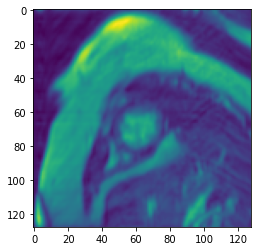

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.abs(im_orig.as_array())[0, ...])
plt.show

In [7]:
print(label.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  12 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1

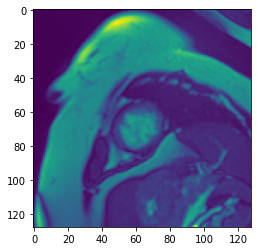

In [8]:
plt.imshow(label.get_fdata()[0, ...])
plt.show()

In [9]:
animated_imshow(label.get_fdata())